# Descriptive statistics, statistical models, data visualization

In this lab, we  study the [United States Renewable Energy Technical Potential dataset](https://data.world/doe/united-states-renewable-energy). 

Create an account on data.world to download the [usretechnicalpotential.csv
](https://data.world/doe/united-states-renewable-energy/workspace/file?filename=usretechnicalpotential.csv) file. 
 
This dataset provides the technical potential of renewable energie for the states of USA.
 
The technical potential of a renewable energy represents the achievable energy generation of a particular technology given system performance, topographic limitations, environmental, and land-use constraints.
 
List of renewable energies considered in the dataset:
- Urban utility-scale photovoltaics  
- Rural utility-scale photovoltaics 
- Rooftop photovoltaics  
- Concentrating solar power  
- Onshore wind power  
- Offshore wind power  
- Biopower  
- Hydrothermal power systems
- Enhanced geothermal
- Hydropower 
 
Precise definitions of the variables (columns) in the dataset are given in the [technical report](https://data.world/doe/united-states-renewable-energy/workspace/file?filename=usretechpotential.pdf). Take the time to read these definitions to understand the exact meaning of the available variables.

We use several Python modules dedicated to statistical data processing. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats 
import numpy
import seaborn as sns

Python comes with a package for handling data as a table : the [Pandas](http://pandas.pydata.org/) package provides a container for tables, called **dataframe**.

We recommend that you have a look at the ["10 minutes to pandas" doc](https://pandas.pydata.org/docs/user_guide/10min.html#min).

A dataframe is a two-dimensional table, in which each column contains measurements on one variable, and each row contains one individual.

The main features of Pandas and its dataframe are:
- reading data from csv and Excel files;
- giving names to variables;
- storing in a clever manner a large amound of data;
- providing methods for descriptive statistics.

## Creating and reading a dataframe <a id="part2sec1"></a>

A dataframe may be either read from a file or created from raw data.

In [3]:
!cat usretechnicalpotential.csv

'cat' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [4]:
usretechnical = pd.read_csv('usretechnicalpotential.csv', sep=',', index_col=0)
usretechnical

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
Alabama,35850,20,426,3706838,2114,44058,15475.0,12,0,0,...,1533,0,326186,0,0,535489.0,67.0,4102,0,2435
Alaska,166,0,2,8282976,9005,187608,NaN,1,0,0,...,61,0,13156,15437,1,NaN,NaN,23675,5,3053
Arizona,121305,52,1096,11867693,5147,107230,22736.0,14,12544333,3527,...,837,0,178188,8329,1,1239147.0,157.0,1303,0,1958
Arkansas,28960,15,332,4986388,2747,57239,8484.0,6,0,0,...,1063,0,226178,0,0,628621.0,79.0,6093,1,3268
California,246008,111,2320,8855917,4010,83549,106411.0,75,8490916,2725,...,15510,1,3300211,130921,16,1344179.0,170.0,30023,6,9692
Colorado,43470,19,399,10238083,4514,94046,16162.0,11,9154524,3097,...,1224,0,260470,8953,1,1251657.0,158.0,7789,1,5060
Connecticut,7716,4,100,19627,12,256,6616.0,5,0,0,...,414,0,88227,0,0,56078.0,7.0,922,0,659
Delaware,14856,9,189,272332,167,3482,2185.0,1,0,0,...,385,0,82013,0,0,22813.0,2.0,30,0,25
District of Columbia,8,0,0,0,0,0,2490.0,2,0,0,...,4,0,977,0,0,697.0,0.0,0,0,2
Florida,72787,39,830,5137346,2812,58596,63986.0,49,358,0,...,3693,0,785787,0,0,374161.0,47.0,682,0,493


Since it is unrealistic to view a table in whole, Pandas provides different methods to give a sneak look at the aforesaid table.

In [4]:
usretechnical.index  # Index of the table

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [5]:
usretechnical.columns  # Columns of the table

Index(['urbanUtilityScalePV_GWh', 'urbanUtilityScalePV_GW',
       'urbanUtilityScalePV_km2', 'ruralUtilityScalePV_GWh',
       'ruralUtilityScalePV_GW', 'ruralUtilityScalePV_km2', 'rooftopPV_GWh',
       'rooftopPV_GW', 'CSP_GWh', 'CSP_GW', 'CSP_km2', 'onshoreWind_GWh',
       'onshoreWind_GW', 'onshoreWind_km2', 'offshoreWind_GWh',
       'offshoreWind_GW', 'offshoreWind_km2', 'biopowerSolid_GWh',
       'biopowerSolid_GW', 'biopowerSolid_BDT', 'biopowerGaseous_GWh',
       'biopowerGaseous_GW', 'biopowerGaseous_Tonnes-CH4',
       'geothermalHydrothermal_GWh', 'geothermalHydrothermal_GW',
       'EGSGeothermal_GWh', 'EGSGeothermal_GW', 'hydropower_GWh',
       'hydropower_GW', 'hydropower_countOfSites'],
      dtype='object')

In [6]:
usretechnical.head(n=3)

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
Alabama,35850,20,426,3706838,2114,44058,15475.0,12,0,0,...,1533,0,326186,0,0,535489.0,67.0,4102,0,2435
Alaska,166,0,2,8282976,9005,187608,NaN,1,0,0,...,61,0,13156,15437,1,NaN,NaN,23675,5,3053
Arizona,121305,52,1096,11867693,5147,107230,22736.0,14,12544333,3527,...,837,0,178188,8329,1,1239147.0,157.0,1303,0,1958


In [7]:
usretechnical.tail(n=3)

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
West Virginia,3023,2,41,52693,35,729,4220.0,3,0,0,...,281,0,59811,0,0,261376.0,33.0,4408,1,1711
Wisconsin,54938,34,727,5042258,3205,66788,13939.0,12,0,0,...,2072,0,441053,0,0,647173.0,82.0,2286,1,1863
Wyoming,7232,3,75,5727224,2854,59463,1550.0,1,5406407,1955,...,50,0,10670,1373,0,1070078.0,135.0,4445,1,2842


In [8]:
usretechnical.values  # Values are in a Numpy array

array([[3.58500e+04, 2.00000e+01, 4.26000e+02, ..., 4.10200e+03,
        0.00000e+00, 2.43500e+03],
       [1.66000e+02, 0.00000e+00, 2.00000e+00, ..., 2.36750e+04,
        5.00000e+00, 3.05300e+03],
       [1.21305e+05, 5.20000e+01, 1.09600e+03, ..., 1.30300e+03,
        0.00000e+00, 1.95800e+03],
       ...,
       [3.02300e+03, 2.00000e+00, 4.10000e+01, ..., 4.40800e+03,
        1.00000e+00, 1.71100e+03],
       [5.49380e+04, 3.40000e+01, 7.27000e+02, ..., 2.28600e+03,
        1.00000e+00, 1.86300e+03],
       [7.23200e+03, 3.00000e+00, 7.50000e+01, ..., 4.44500e+03,
        1.00000e+00, 2.84200e+03]])

The methods `info` and `describe` give respectively general and quantitative information concerning the dataframe.
In particular, `info` indicates the categorical variables (which are not treated by `describe`).

In [9]:
usretechnical.describe()

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,49.000000,51.000000,5.100000e+01,51.000000,...,51.000000,51.000000,5.100000e+01,51.000000,51.000000,4.900000e+01,49.000000,51.000000,51.000000,51.000000
mean,43758.235294,23.431373,496.921569,5.502219e+06,2999.019608,62488.843137,16708.387755,12.529412,2.277377e+06,746.215686,...,1735.843137,0.019608,3.694256e+05,5909.333333,0.627451,6.396872e+05,80.571429,5077.039216,0.745098,2512.274510
std,54365.369016,27.735360,577.748348,6.284523e+06,3313.295462,69026.482269,19629.574820,14.584036,4.716721e+06,1520.849201,...,2476.107537,0.140028,5.268432e+05,19616.831126,2.357633,5.403773e+05,68.520374,6834.337527,1.547167,2182.471948
min,8.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1115.000000,1.000000,0.000000e+00,0.000000,...,4.000000,0.000000,9.770000e+02,0.000000,0.000000,6.970000e+02,0.000000,0.000000,0.000000,2.000000
25%,12162.000000,6.000000,134.000000,1.296446e+06,792.000000,16508.000000,5336.000000,3.000000,0.000000e+00,0.000000,...,369.000000,0.000000,7.862050e+04,0.000000,0.000000,3.532060e+05,44.000000,1278.500000,0.000000,1038.000000
50%,30492.000000,16.000000,338.000000,4.876185e+06,2395.000000,49908.000000,12442.000000,10.000000,0.000000e+00,0.000000,...,1063.000000,0.000000,2.261780e+05,0.000000,0.000000,4.959210e+05,62.000000,2818.000000,0.000000,1863.000000
75%,51824.000000,31.000000,659.500000,8.235158e+06,4211.000000,87743.000000,19685.000000,14.000000,2.220892e+06,803.000000,...,2183.500000,0.000000,4.647680e+05,686.500000,0.000000,9.219720e+05,116.000000,4663.500000,1.000000,3127.000000
max,294684.000000,154.000000,3213.000000,3.899358e+07,20411.000000,425230.000000,106411.000000,75.000000,2.278675e+07,7743.000000,...,15510.000000,1.000000,3.300211e+06,130921.000000,16.000000,3.030250e+06,384.000000,30023.000000,6.000000,9692.000000


In [10]:
usretechnical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   urbanUtilityScalePV_GWh     51 non-null     int64  
 1   urbanUtilityScalePV_GW      51 non-null     int64  
 2   urbanUtilityScalePV_km2     51 non-null     int64  
 3   ruralUtilityScalePV_GWh     51 non-null     int64  
 4   ruralUtilityScalePV_GW      51 non-null     int64  
 5   ruralUtilityScalePV_km2     51 non-null     int64  
 6   rooftopPV_GWh               49 non-null     float64
 7   rooftopPV_GW                51 non-null     int64  
 8   CSP_GWh                     51 non-null     int64  
 9   CSP_GW                      51 non-null     int64  
 10  CSP_km2                     51 non-null     int64  
 11  onshoreWind_GWh             51 non-null     int64  
 12  onshoreWind_GW              51 non-null     int64  
 13  onshoreWind_km2             51 

In the dataframe, the `biopowerGaseous_GW` variable should be a categorical variable.

In [11]:
usretechnical['biopowerGaseous_GW']

Alabama                 0
Alaska                  0
Arizona                 0
Arkansas                0
California              1
Colorado                0
Connecticut             0
Delaware                0
District of Columbia    0
Florida                 0
Georgia                 0
Hawaii                  0
Idaho                   0
Illinois                0
Indiana                 0
Iowa                    0
Kansas                  0
Kentucky                0
Louisiana               0
Maine                   0
Maryland                0
Massachusetts           0
Michigan                0
Minnesota               0
Mississippi             0
Missouri                0
Montana                 0
Nebraska                0
Nevada                  0
New Hampshire           0
New Jersey              0
New Mexico              0
New York                0
North Carolina          0
North Dakota            0
Ohio                    0
Oklahoma                0
Oregon                  0
Pennsylvania

In [12]:
usretechnical['biopowerGaseous_GW'] = usretechnical['biopowerGaseous_GW'].astype('category')

In [13]:
usretechnical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   urbanUtilityScalePV_GWh     51 non-null     int64   
 1   urbanUtilityScalePV_GW      51 non-null     int64   
 2   urbanUtilityScalePV_km2     51 non-null     int64   
 3   ruralUtilityScalePV_GWh     51 non-null     int64   
 4   ruralUtilityScalePV_GW      51 non-null     int64   
 5   ruralUtilityScalePV_km2     51 non-null     int64   
 6   rooftopPV_GWh               49 non-null     float64 
 7   rooftopPV_GW                51 non-null     int64   
 8   CSP_GWh                     51 non-null     int64   
 9   CSP_GW                      51 non-null     int64   
 10  CSP_km2                     51 non-null     int64   
 11  onshoreWind_GWh             51 non-null     int64   
 12  onshoreWind_GW              51 non-null     int64   
 13  onshoreWind_km2 

## Indexing a table <a id="part1sec2"></a>

#### Natural indexing

Explanations are provided with the `usretechnical` dataframe.

In [14]:
usretechnical['urbanUtilityScalePV_GWh']

Alabama                  35850
Alaska                     166
Arizona                 121305
Arkansas                 28960
California              246008
Colorado                 43470
Connecticut               7716
Delaware                 14856
District of Columbia         8
Florida                  72787
Georgia                  43166
Hawaii                    3725
Idaho                    23194
Illinois                103551
Indiana                  98815
Iowa                     27091
Kansas                   31705
Kentucky                 26514
Louisiana                55669
Maine                     3216
Maryland                 28551
Massachusetts            17469
Michigan                 50845
Minnesota                33370
Mississippi              26366
Missouri                 30549
Montana                  11370
Nebraska                 12954
Nevada                   24893
New Hampshire             3790
New Jersey               44307
New Mexico               71356
New York

This object is a serie. It can be equivalently obtained using `MyDataFram.MyVariable` : 

In [15]:
s = usretechnical.urbanUtilityScalePV_GWh # a Serie
s['Nevada']

24893

You may want to extract several columns or several rows.

In [16]:
usretechnical[['urbanUtilityScalePV_GWh','offshoreWind_GWh']].head()
# par default, 5 rows

,urbanUtilityScalePV_GWh,offshoreWind_GWh
Alabama,35850,0.0
Alaska,166,NaN
Arizona,121305,NaN
Arkansas,28960,NaN
California,246008,2662579.0


In [17]:
s[['Nevada', 'Wisconsin']]

Nevada       24893
Wisconsin    54938
Name: urbanUtilityScalePV_GWh, dtype: int64

**Remark:** selecting with `[[]]` always return a dataframe.

In [18]:
usretechnical[['urbanUtilityScalePV_GWh']].head()

,urbanUtilityScalePV_GWh
Alabama,35850
Alaska,166
Arizona,121305
Arkansas,28960
California,246008


#### Label based indexing

Label based indexing is an enhancement of natural indexing, accessible with `.loc[]`.

Indexing has to be thought *as a matrix but with labels instead of positions*.

Hence, the **rows** are indexed first (instead of the columns with `[]`).

In [19]:
usretechnical.loc['Nevada']  # Single row

urbanUtilityScalePV_GWh         24893.0
urbanUtilityScalePV_GW             10.0
urbanUtilityScalePV_km2           224.0
ruralUtilityScalePV_GWh       8614454.0
ruralUtilityScalePV_GW           3732.0
ruralUtilityScalePV_km2         77751.0
rooftopPV_GWh                   10767.0
rooftopPV_GW                        7.0
CSP_GWh                       8295752.0
CSP_GW                           2557.0
CSP_km2                         77759.0
onshoreWind_GWh                 17709.0
onshoreWind_GW                      7.0
onshoreWind_km2                  1449.0
offshoreWind_GWh                    NaN
offshoreWind_GW                     NaN
offshoreWind_km2                    NaN
biopowerSolid_GWh                 288.0
biopowerSolid_GW                    0.0
biopowerSolid_BDT              262613.0
biopowerGaseous_GWh               325.0
biopowerGaseous_GW                  0.0
biopowerGaseous_Tonnes-CH4      69248.0
geothermalHydrothermal_GWh      45320.0
geothermalHydrothermal_GW           5.0


In [20]:
usretechnical.loc[:, 'urbanUtilityScalePV_GWh'].head()  # Single column

Alabama        35850
Alaska           166
Arizona       121305
Arkansas       28960
California    246008
Name: urbanUtilityScalePV_GWh, dtype: int64

In [21]:
usretechnical.loc[['Nevada', 'Wisconsin']]  # Multiple rows

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
Nevada,24893,10,224,8614454,3732,77751,10767.0,7,8295752,2557,...,325,0,69248,45320,5,1262174.0,160.0,845,0,1489
Wisconsin,54938,34,727,5042258,3205,66788,13939.0,12,0,0,...,2072,0,441053,0,0,647173.0,82.0,2286,1,1863


Slicing on rows and columns is possible but **endpoints are included**.

In [22]:
usretechnical.loc['Nevada':'New York']  # Row slicing

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
Nevada,24893,10,224,8614454,3732,77751,10767.0,7,8295752,2557,...,325,0,69248,45320,5,1262174.0,160.0,845,0,1489
New Hampshire,3790,2,48,57363,35,741,2298.0,2,0,0,...,389,0,82889,0,0,104314.0,13.0,1740,0,810
New Jersey,44307,25,527,439773,251,5231,15767.0,13,0,0,...,2310,0,491691,0,0,35230.0,4.0,549,0,402
New Mexico,71356,30,645,16318543,7087,147652,6513.0,4,16812349,4860,...,353,0,75228,12933,1,1417978.0,179.0,1362,0,1810
New York,52803,32,682,1492566,926,19294,28779.0,25,0,0,...,2950,0,627734,0,0,375400.0,47.0,6711,1,4839


#### Integer position based indexing

Interger location (or position) based indexing is done with `.iloc[]`.
It is similar to `.loc[]` but considers only integer positions instead of labels.

loc使用标签索引：loc基于行和列的标签进行选择。这意味着你可以使用行和列的标签来选择数据。例如，df.loc[1, 'column_name']会选择行标签为1和列标签为'column_name'的数据。

iloc使用整数位置索引：iloc基于行和列的整数位置进行选择。这意味着你可以使用行和列的整数位置来选择数据。

**Remark:** endpoints are not included (similarly to Numpy).

In [23]:
usretechnical.iloc[:2]

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
Alabama,35850,20,426,3706838,2114,44058,15475.0,12,0,0,...,1533,0,326186,0,0,535489.0,67.0,4102,0,2435
Alaska,166,0,2,8282976,9005,187608,NaN,1,0,0,...,61,0,13156,15437,1,NaN,NaN,23675,5,3053


In [24]:
usretechnical.iloc[10::4, ::2]  # select from 10th row and every 4th row   ----slicing rows
                                # ::2 means selecting every 2th colomn     ----slicing colomns
'''
df.iloc[1:3, 0:3]
1:3 represent from 1 to 2 excluding 3
0:3 the same
'''

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_km2,ruralUtilityScalePV_GW,rooftopPV_GWh,CSP_GWh,CSP_km2,onshoreWind_GW,offshoreWind_GWh,offshoreWind_km2,biopowerSolid_GW,biopowerGaseous_GWh,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GW,EGSGeothermal_GW,hydropower_GW
Georgia,43166,505,3088,31116.0,0,0,0,220807.0,11725.0,1,2220,472546,0,44.0,0
Indiana,98815,1274,3018,17151.0,0,0,148,165.0,9.0,1,2978,633660,0,55.0,0
Louisiana,55669,674,2394,14368.0,0,0,0,1200698.0,68122.0,1,857,182404,0,61.0,0
Michigan,50845,699,3443,23527.0,0,0,59,1739800.0,84515.0,1,2539,540282,0,58.0,0
Montana,11370,127,4402,2194.0,1540287,16939,944,NaN,NaN,0,147,31324,0,208.0,3
New Jersey,44307,527,251,15767.0,0,0,0,429807.0,20386.0,0,2310,491691,0,4.0,0
North Dakota,4871,57,5482,1916.0,36049,396,770,NaN,NaN,1,30,6383,0,104.0,0
Pennsylvania,56161,754,356,22215.0,0,0,3,23571.0,1134.0,0,7132,1517540,0,41.0,1
Tennessee,50243,595,1266,19685.0,0,0,0,NaN,NaN,0,1984,422220,0,54.0,1
Virginia,27451,326,1074,22266.0,0,0,1,361053.0,17814.0,0,2498,531592,0,36.0,0


#### Boolean indexing

Similarly to Numpy arrays, dataframes can be indexed with Boolean variables thanks to `.loc[]`.

In [26]:
usretechnical.loc[usretechnical['urbanUtilityScalePV_GWh'] > 50000]  # Row selection

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
Arizona,121305,52,1096,11867693,5147,107230,22736.0,14,12544333,3527,...,837,0,178188,8329,1,1239147.0,157.0,1303,0,1958
California,246008,111,2320,8855917,4010,83549,106411.0,75,8490916,2725,...,15510,1,3300211,130921,16,1344179.0,170.0,30023,6,9692
Florida,72787,39,830,5137346,2812,58596,63986.0,49,358,0,...,3693,0,785787,0,0,374161.0,47.0,682,0,493
Illinois,103551,63,1324,8090985,4969,103524,30086.0,26,0,0,...,4222,0,898345,0,0,676055.0,85.0,4882,1,1330
Indiana,98815,61,1274,4876185,3018,62890,17151.0,14,0,0,...,2978,0,633660,0,0,434258.0,55.0,2394,0,1142
Louisiana,55669,32,674,4114605,2394,49876,14368.0,11,0,0,...,857,0,182404,0,0,484271.0,61.0,2423,0,934
Michigan,50845,33,699,5215639,3443,71740,23527.0,21,0,0,...,2539,0,540282,0,0,457850.0,58.0,1180,0,1942
New Mexico,71356,30,645,16318543,7087,147652,6513.0,4,16812349,4860,...,353,0,75228,12933,1,1417978.0,179.0,1362,0,1810
New York,52803,32,682,1492566,926,19294,28779.0,25,0,0,...,2950,0,627734,0,0,375400.0,47.0,6711,1,4839
North Carolina,68346,37,789,4232789,2346,48892,28419.0,23,0,0,...,3780,0,804301,0,0,420741.0,53.0,3036,0,2131


#### Selection random samples

The `sample` method makes it possible to <mark>randomly</mark> select rows (individuals) from a dataframe (without replacement).

In [32]:
usretechnical.sample(n=3)

,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,CSP_GW,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
Ohio,86495,57,1190,3626181,2395,49908,30064.0,27,0,0,...,3363,0,715603,0,0,495921.0,62.0,3045,0,1791
Maryland,28551,18,378,585949,373,7772,14849.0,12,0,0,...,1226,0,260965,0,0,86649.0,10.0,814,0,491
Nevada,24893,10,224,8614454,3732,77751,10767.0,7,8295752,2557,...,325,0,69248,45320,5,1262174.0,160.0,845,0,1489


## Adding and deleting items <a id="part2sec4"></a>

Let us consider a copy of the first 5 rows of `consumption`.

In [33]:
usbis= usretechnical.iloc[:5,[1,4]].copy()
usbis

,urbanUtilityScalePV_GW,ruralUtilityScalePV_GW
Alabama,20,2114
Alaska,0,9005
Arizona,52,5147
Arkansas,15,2747
California,111,4010


We successively add a column and a row to `usbis`.

In [61]:
usbis['sum'] = usbis.sum(axis=1)    # Calculate sum of every row
usbis.loc['PaysDeLaLoire'] = [10000, 100, 10100]   # add a row
usbis.loc['abcd'] = [233, 455, 567]
usbis

,urbanUtilityScalePV_GW,ruralUtilityScalePV_GW,sum
Alabama,20,2114,2134
Alaska,0,9005,9005
Arizona,52,5147,5199
Arkansas,15,2747,2762
California,111,4010,4121
abcd,233,455,567
PaysDeLaLoire,10000,100,10100


that we can now drop

In [62]:
usbis = usbis.drop('PaysDeLaLoire')
usbis = usbis.drop('sum', axis=1)
usbis = usbis.drop('abcd')
usbis

,urbanUtilityScalePV_GW,ruralUtilityScalePV_GW
Alabama,20,2114
Alaska,0,9005
Arizona,52,5147
Arkansas,15,2747
California,111,4010


## Managing missing data <a id="part2sec5"></a>

Missing data are generally replaced by a `NaN` in the table.
Pandas offers several possibilities to manage them.

In [63]:
#offshorewind_gwh
#offshorewind_gw
uster= usretechnical.iloc[:15,6:8].copy()   
'''
usretechnical.iloc[:15, 6:8] 返回的是原始DataFrame的一个子集，如果您对这个子集进行更改，它可能会影响到原始DataFrame中相同的位置。
'''
uster.head()  # A table with missing data

,rooftopPV_GWh,rooftopPV_GW
Alabama,15475.0,12
Alaska,NaN,1
Arizona,22736.0,14
Arkansas,8484.0,6
California,106411.0,75


In [64]:
uster.dropna()  # Drop any row with missing data

,rooftopPV_GWh,rooftopPV_GW
Alabama,15475.0,12
Arizona,22736.0,14
Arkansas,8484.0,6
California,106411.0,75
Colorado,16162.0,11
Connecticut,6616.0,5
Delaware,2185.0,1
District of Columbia,2490.0,2
Florida,63986.0,49
Georgia,31116.0,24


In [74]:
uster.isnull().any()  # Test for missing data

rooftopPV_GWh     True
rooftopPV_GW     False
dtype: bool

> **Question**
> 
> By changing the `axis` parameter of `dropna`, drop the columns with missing values of `usretechnical`.

In [ ]:
# Answer
usretechnical.dropna(axis = 1)


## Analyzing and Visualizing a Quantitative Variable

#### Descriptive statistics <a id="part1sec6"></a>


A dataframe comes with many methods for descriptive statistics:
- `count`: 	Number of non-null observations;
- `sum`: 	Sum of values;
- `mean`: 	Mean of values;
- `mad`: 	Mean absolute deviation;
- `median`: 	Arithmetic median of values;
- `min`: 	Minimum;
- `max`: 	Maximum;
- `mode`: 	Mode;
- `abs`: 	Absolute Value;
- `prod`: 	Product of values;
- `std`: 	Bessel-corrected sample standard deviation;
- `var`: 	Unbiased variance;
- `sem`: 	Standard error of the mean;
- `skew`: 	Sample skewness (3rd moment);
- `kurt`: 	Sample kurtosis (4th moment);
- `quantile`: 	Sample quantile (value at %);
- `cumsum`: 	Cumulative sum;
- `cumprod`: 	Cumulative product;
- `cummax`: 	Cumulative maximum;
- `cummin`: 	Cumulative minimum.

In [82]:
usretechnical.median()  # Median of numeric columns

urbanUtilityScalePV_GWh         30492.0
urbanUtilityScalePV_GW             16.0
urbanUtilityScalePV_km2           338.0
ruralUtilityScalePV_GWh       4876185.0
ruralUtilityScalePV_GW           2395.0
ruralUtilityScalePV_km2         49908.0
rooftopPV_GWh                   12442.0
rooftopPV_GW                       10.0
CSP_GWh                             0.0
CSP_GW                              0.0
CSP_km2                             0.0
onshoreWind_GWh                 28742.0
onshoreWind_GW                     11.0
onshoreWind_km2                  2250.0
offshoreWind_GWh               317754.0
offshoreWind_GW                    80.0
offshoreWind_km2                16134.0
biopowerSolid_GWh                6984.0
biopowerSolid_GW                    0.0
biopowerSolid_BDT             6349820.0
biopowerGaseous_GWh              1063.0
biopowerGaseous_GW                  0.0
biopowerGaseous_Tonnes-CH4     226178.0
geothermalHydrothermal_GWh          0.0
geothermalHydrothermal_GW           0.0


In [86]:
n = usretechnical['urbanUtilityScalePV_GWh'].mean()
n

43758.23529411765

> **Question**
> 
> Compute the median m of the `urbanUtilityScalePV_GWh` variable. Compute the mean of the `ruralUtilityScalePV_GWh`variable   
> - on the subset of states for which with `urbanUtilityScalePV_GWh` is larger than m   
> - on the subset of the states for which `urbanUtilityScalePV_GWh` is smaller than m

In [92]:
# Answer 
m = usretechnical['urbanUtilityScalePV_GWh'].median()
n = usretechnical['ruralUtilityScalePV_GWh'].mean()
print("m = ",m)
print("n = ",n)

m =  30492.0
n =  5502219.411764706


> **Question**
> 
> What is the offshore Wind Power of all US ?

In [94]:
# Answer 
print("The offshore Wind Power of all US is ",usretechnical['offshoreWind_GWh'].sum())


The offshore Wind Power of all US is  16975788.0


> **Question**
> Check that the quantile 20% of the [CSP variable](https://en.wikipedia.org/wiki/Concentrated_solar_power) is equal to 0. How > do you explain this ?

In [121]:
# Answer
num = 0
usretechnical.loc[:,'urbanUtilityScalePV_GWh']


Alabama                  35850
Alaska                     166
Arizona                 121305
Arkansas                 28960
California              246008
Colorado                 43470
Connecticut               7716
Delaware                 14856
District of Columbia         8
Florida                  72787
Georgia                  43166
Hawaii                    3725
Idaho                    23194
Illinois                103551
Indiana                  98815
Iowa                     27091
Kansas                   31705
Kentucky                 26514
Louisiana                55669
Maine                     3216
Maryland                 28551
Massachusetts            17469
Michigan                 50845
Minnesota                33370
Mississippi              26366
Missouri                 30549
Montana                  11370
Nebraska                 12954
Nevada                   24893
New Hampshire             3790
New Jersey               44307
New Mexico               71356
New York

#### Histograms
A common task in statisics is to estimate a distribution from a data sample.
In a first approach, this task can be achieved by computing a histogram.

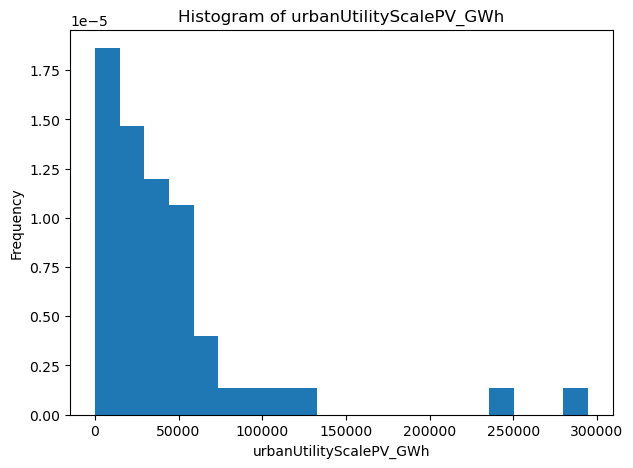

In [122]:
import matplotlib.pyplot as plt

x = usretechnical['urbanUtilityScalePV_GWh']

plt.figure(figsize=(7, 5))
plt.hist(x, bins=20, density=True)
plt.xlabel('urbanUtilityScalePV_GWh')
plt.ylabel('Frequency')
plt.title('Histogram of urbanUtilityScalePV_GWh')
plt.show()

#### Kernel density estimation
Kernel density estimation is a tool more efficient than a histogram for density estimation.
In Python, kernel density estimation can be performed with the `gaussian_kde` function.

In [ ]:
grid = np.linspace(1,300000,10000)

In [ ]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(x)

fig, ax = plt.subplots()
(hist_plt, bins_plt, patches) = ax.hist(x, bins=20, density=True)
ax.plot(grid, kde(grid), color="magenta", linewidth=2, label="kde")
ax.legend()

Under the assumption that the distribution belongs to a given parametric family, you can estimate the paramter of the distribution with the maximum likelihood method (see next lab).

#### Boxplots

You can draw boxplots using:
- the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function of matplotlib,
- the [boxplot(column)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) method on a pandas DataFrame
- [.plot.box()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html) on a Series pandas
- the [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) function of seaborn.

Below is a boxplot for the `urbanUtilityScalePV_GWh` variable using seaborn.

In [ ]:
sns.boxplot(data = usretechnical.urbanUtilityScalePV_GWh )

> **Question**
> 
> Display on the same graph the boxplots of the `onshoreWind_GW` and the `offshoreWind_GW` variables using the boxplot function of pandas.

In [ ]:
# Answer



#### Violon plots

Violin plots are boxplots that also estimate and represent densities. The graphical representation is more advanced but beware of borderline cases, because the density estimate is not always appropriate (sample size too small, the estimate may "exceed" the min/max of the data).

- [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function from seaborn
- [violinplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) function from matplotlib
- No method on DataFrame

> **Question**
> 
> Display on the same graph the violon plots of the `urbanUtilityScalePV_GWh` and `ruralUtilityScalePV_GWh` variables using seaborn

In [ ]:
# Answer



## Analyzing and Visualizing a Categorical Variable

We first create a Categorical variable that corresponds to a discretization of the continuous variable 
`urbanUtilityScalePV_GWh`.

In [ ]:
q1 = usretechnical.urbanUtilityScalePV_GWh.quantile(0.33) 
q2 = usretechnical.urbanUtilityScalePV_GWh.quantile(0.66) 

usretechnical['UrbanPV_Class'] = pd.cut(usretechnical['urbanUtilityScalePV_GWh'],
                            bins=[0, q1, q2, float('Inf')],
                            labels=['low', 'middle', 'high'])

usretechnical.head()

> **Question**
> 
> Create in the same way a new variable `RuralPV_Class` corresponding to a discretization of the continuous variable  `ruralUtilityScalePV_GWh`.

In [ ]:
# Answer



> **Question**
> 
> Create a new variable `SCP0` taking the value 1 if CSP_GW = 0 and 0 otherwise.

In [ ]:
# Answer



In [ ]:
usretechnical.head()

#### Statistiques descriptives

The `describe` method also display statistics for categorical variables.

In the case a variable has not the `category` type, you can change it using the `astype('category')` method (see [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [ ]:
usretechnical.describe(include='category')

> **Question**
> 
> For each categorical variable, display the values it can take using the function [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html). Then display the number of observations for each of these categories using [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html). Sort the results in **descending** order with [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

In [ ]:
# Answer 



In [ ]:
# Answer



In [ ]:
usretechnical['RuralPV_Class'].value_counts().sort_values(ascending=False)

In [ ]:
usretechnical['SCP0'].value_counts().sort_values(ascending=False)

#### Bar plot

We compute the table of frequencies of the variable `SCP0` with the function [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html). Make the sum of the frequencies equal to 1 and store the result in a variable.

In [ ]:
cross = pd.crosstab(usretechnical['SCP0'], "freq", normalize=True)
cross

Display a barplot of `SCP0` (not to be confused with a histogram!), using the `.plot.bar` method on the frequency table.

In [ ]:
cross.plot.bar()
plt.show()

## Bivariate descriptive statistics

In this section, we study the correlations between pairs of variables. Of course, a non-null correlation does not mean causality (see for example this popular page on this subject).

In the following, we compute correlations and we propose graphical representations to study and illustrate these correlations. Note, however, that to rigorously establish the existence of a correlation, a simple graph is not sufficient. This would require the use of statistical tests (not studied in this course).

### Two numerical variables (quantitative - quantitative)

For convenience, for this lab we first extract a sub Dataframe with only a few variables 

We also pay attention to keep only one variable per energy type.

> **Question**
> 
> Extract a sub dataframe `sub_US_re` containing only the columns:
> - urbanUtilityScalePV_GWh
> - ruralUtilityScalePV_GWh
> - rooftopPV_GWh
> - CSP_GWh
> - onshoreWind_GWh
> - offshoreWind_GWh

In [ ]:
# Answer 



#### Correlation Matrix

Using the [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method, compute the [correlation matrix](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices)  of the **numeric** data from the dataset `usretechnical`.

In [ ]:
sub_US_re.corr()

Does it makes sense that `urbanUtilityScalePV_GWh` and `rooftopPV_GWh` are strongly corrolated ? 


Hypothesis : it can be expected that these two variables are both correlated with the state's level of urbanization.

> **Question**
> 
> Display the seaborn heatmap of this correlation matrix using the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function. Choose a colormap using [this link](https://matplotlib.org/stable/tutorials/colors/colormaps.html), and make the scale of values go from 0 to 1.

In [ ]:
# Answer



#### Scatter points

Scatter points probide crossed vizualizations of two numerical variables


> **Question**
> Using the [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function from matplotlib, display a scatter plot with `urbanUtilityScalePV_GWh` on the y-axis and and `rooftopPV_GWh` on the x-axis. Add names to the axes and to the figure.

In [ ]:
# Answer



> **Question**
> 
> Same question using the  [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function of Seaborn.

In [ ]:
# Answer




Seaborn also provides the [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function to combine univariate and bivariate representations.

In [ ]:
sns.jointplot(data = usretechnical,  x='urbanUtilityScalePV_GWh', y='rooftopPV_GWh')

Pandas also provide the function [scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) (`plotting` module) to display all pairs of clouds of points with the numeric variables of the dataset. 

> **Question**
> 
> Apply this function the `sub_US_re` Dataframe.
> Don't forget to change the size of the figure.

In [ ]:
# Answer



### A numerical variable and a categorical variable (quantitative - qualitative)

We study a potential correlation between `ruralUtilityScalePV_GWh` and `SCP0`.

In [ ]:
usretechnical.groupby('SCP0')[['ruralUtilityScalePV_GWh']].describe()

It seems that ruralUtilityScalePV_GWh tends to be lower when SCP0 = 1.

#### Violon plots and boxplots

We can compare the two distributions of `ruralUtilityScalePV_GWh` conditionnaly to SCP0 = 0 or 1, using violon plots and boxplots.

In [ ]:
sns.violinplot(data = usretechnical, x='SCP0', y='ruralUtilityScalePV_GWh')

The distribution of `ruralUtilityScalePV` is more concentrated when SCP=0 than when SCP=0. Higher values of `ruralUtilityScalePV` are observed when SCP >0, indeed a few extremal points are observed for SCP >0.

> **Question**
> 
> Display a similar representation using boxplots

In [ ]:
# Answer



Box plots clearly provide a more efficient representation for analyzing extreme points (sometimes called "outliers").

### Two categorical (qualitative - qualitative)

#### Contengency table

The contingency table between two categorical variables is calculated with the pandas [crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) function. Compute the contingency table of the `SCP0` and `RuralPV_Class` variables.

In [ ]:
pd.crosstab(usretechnical['SCP0'], usretechnical['RuralPV_Class'])

The `margins` parameter can be used to also compute subtotals by row and column:

In [ ]:
pd.crosstab(usretechnical['SCP0'], usretechnical['RuralPV_Class'], margins=True)

You can also use `normalize` to normalize the counts in various ways:

In [ ]:
pd.crosstab(usretechnical['SCP0'], usretechnical['RuralPV_Class'],  normalize=True)

In [ ]:
pd.crosstab(usretechnical['SCP0'], usretechnical['RuralPV_Class'],  normalize='index', margins=True)

In [ ]:
pd.crosstab(usretechnical['SCP0'], usretechnical['RuralPV_Class'],   normalize='columns', margins=True)

#### Diagramme en barres

> **Question**
> 
> Check that the contingency table is a data frame. Use the `plot.bar` method to draw a bar graph for the values of the contingency table of `SCP0` and `RuralPV_Class`. Put
`SCP0` on the x-axis sex, the number of observations in each group on the y-axis, distinguishing `RuralPV_Class` = low, middle or high, with colors.

In [ ]:
# Answer



> **Question** 
> 
> You can also change the order of the variables in the contingency table and display the corresponding barplot. 

In [ ]:
# Answer

